- Archmage Anachronos tells you he is trying to brew Barkskin Potion.
- Some of his ingredients are not available - he has no access to:
    - Angel Feather
    - Beholder Eye
    - Crushed Ruby
    - Crushed Sapphire
    - Dragon Scale
    - Dragon Spleen
    - Dragon Tongue
    - Dragon's Blood
    - Ectoplasm
    - Eye of Newt
    - Faerie Tears
    - Powdered Silver
- But he does have access to:
    - Badger Skull
    - Beech Bark
    - Crushed Diamond
    - Crushed Onyx
    - Demon Claw
    - Giant's Toe
    - Ground Bone
    - Oaken Twigs
    - Quicksilver
    - Redwood Sap
    - Troll Blood
    - Vampire Fang
- He's asked you which of these ingredients he should use to maximize his odds of brewing a Barkskin Potion successfully.  
- He can use any number of different ingredients in a potion, but cannot use any ingredient more than once: first, this would apparently "trigger a harmonic overload" and ruin the potion, and second, he only has one of most of these things.
- So you could tell him to use Badger Skull and Beech Bark.
- Or you could tell him to use Crushed Diamond, Crushed Onyx, a Demon Claw, and a Giant's Toe.
- Or you could tell him to use all of the available ingredients except for the Vampire Fang.
- But you could not tell him to use two Troll Blood, or three Redwood Sap.
- To help you with this, you have a dataset of past potions he's attempted to brew.  Each row lists which ingredients he included in the potion, and what the result was (either what potion was successfully brewed, or what went wrong.)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
data = pd.read_csv('./dndsci_pot_data.csv')
data.rename(columns={"Dragon's Blood":"Dragon Blood","Giant's Toe":"Giant Toe"}, inplace=True)
ingredient_list = [
"Angel Feather",
"Beholder Eye",
"Crushed Ruby",
"Crushed Sapphire",
"Dragon Scale",
"Dragon Spleen",
"Dragon Tongue",
"Dragon Blood",
"Ectoplasm",
"Eye of Newt",
"Faerie Tears",
"Powdered Silver",
"Badger Skull",
"Beech Bark",
"Crushed Diamond",
"Crushed Onyx",
"Demon Claw",
"Giant Toe",
"Ground Bone",
"Oaken Twigs",
"Quicksilver",
"Redwood Sap",
"Troll Blood",
"Vampire Fang"
]
data

,Angel Feather,Badger Skull,Beech Bark,Beholder Eye,Crushed Diamond,Crushed Onyx,Crushed Ruby,Crushed Sapphire,Demon Claw,Dragon Scale,...,Giant Toe,Ground Bone,Oaken Twigs,Powdered Silver,Quicksilver,Redwood Sap,Troll Blood,Vampire Fang,Result,Success?
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,Magical Explosion,0
1,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,1,Regeneration Potion,1
2,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,Magical Explosion,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,Inert Glop,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Farsight Potion,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118448,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,Inert Glop,0
118449,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,Necromantic Power Potion,1
118450,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,Glibness Potion,1
118451,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,Inert Glop,0


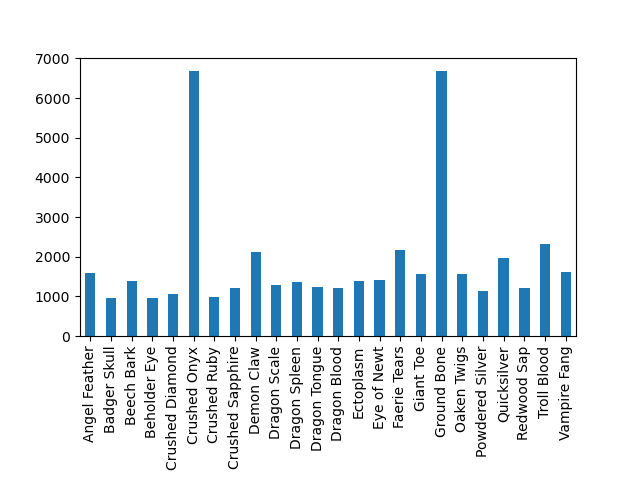

In [11]:
%matplotlib widget
f, a = plt.subplots()
data.query("Result == 'Barkskin Potion'").drop(["Result","Success?"],axis=1).sum().astype(float).plot.bar()
f.subplots_adjust(bottom=0.3)

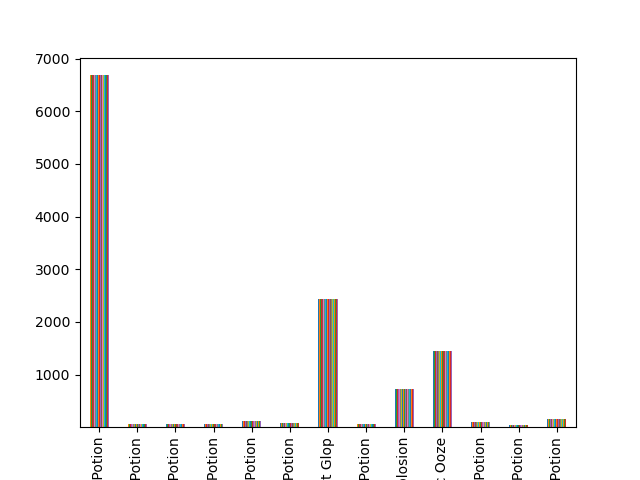

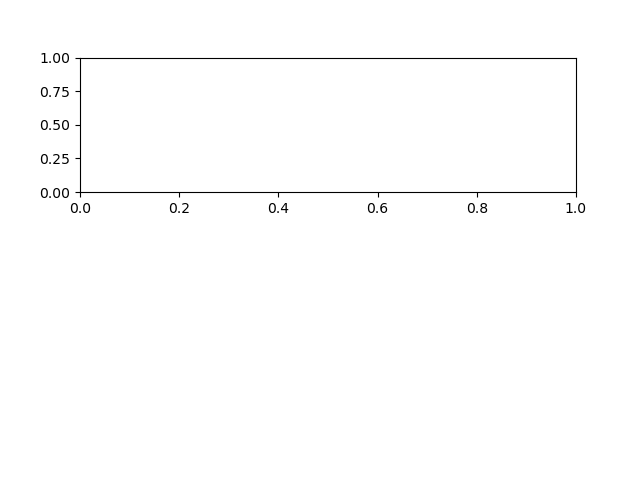

In [12]:
%matplotlib widget
f2, a2 = plt.subplots()
data.query("`Crushed Onyx` == 1 and `Ground Bone` == 1").groupby("Result").count().plot.bar(legend=False, bottom=0.5)
f2.subplots_adjust(bottom=0.6)
plt.show()

,Angel Feather,Badger Skull,Beech Bark,Beholder Eye,Crushed Diamond,Crushed Onyx,Crushed Ruby,Crushed Sapphire,Demon Claw,Dragon Scale,...,Giant Toe,Ground Bone,Oaken Twigs,Powdered Silver,Quicksilver,Redwood Sap,Troll Blood,Vampire Fang,Result,Success?


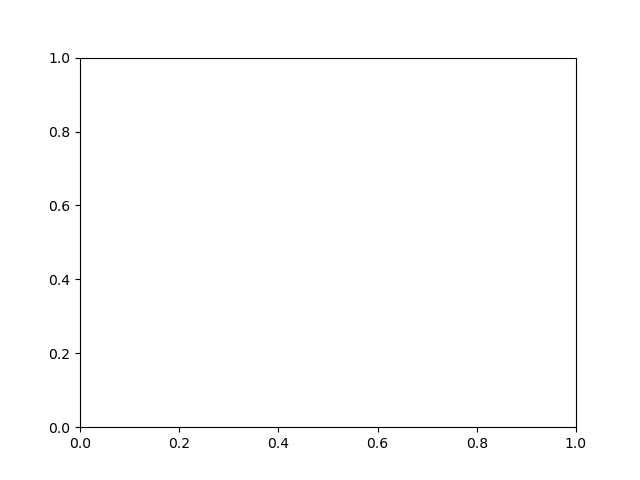

In [13]:
%matplotlib widget
f2, a2 = plt.subplots()
ing = {ing: 1 if ing in {"Crushed Onyx", "Ground Bone"} else 0 for ing in ingredient_list}
query = ' and '.join([f"`{k}` == {v}" for k, v in ing.items()])
data.query(query)

<Axes: xlabel='total'>

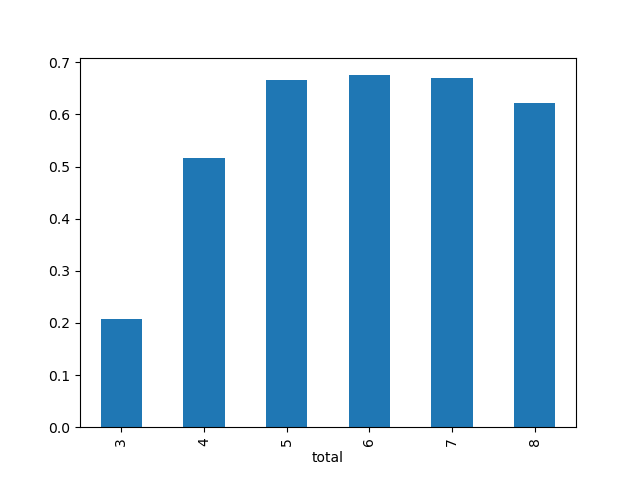

In [32]:
%matplotlib widget
f, a = plt.subplots()
data["total"] = data[ingredient_list].aggregate("sum", axis=1)
data.groupby("total")["Success?"].mean().plot.bar()

<Axes: xlabel='Result'>

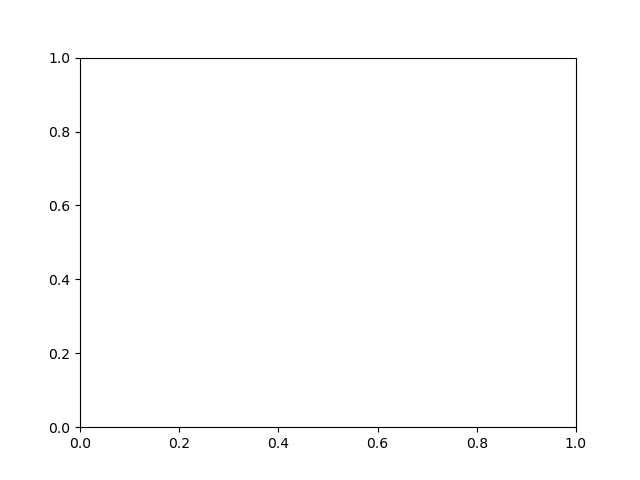

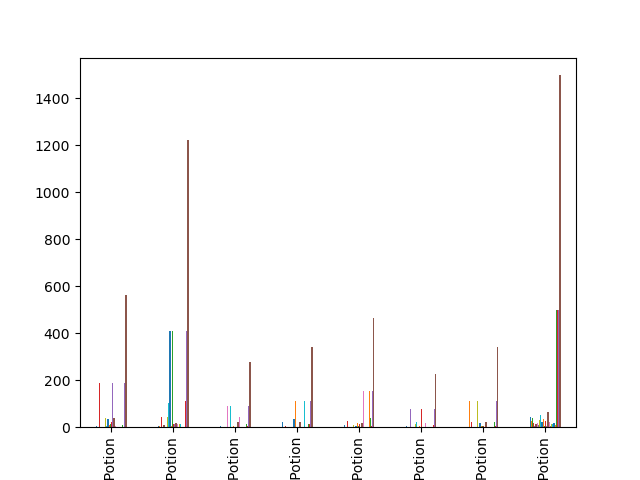

In [43]:
f, a = plt.subplots()
data.query("total == 3 and `Success?` == 1").groupby("Result").sum().plot.bar(legend=False)

In [44]:
data.query("total == 3 and `Success?` == 1").sum()

Angel Feather                                                      95
Badger Skull                                                      146
Beech Bark                                                         40
Beholder Eye                                                      304
Crushed Diamond                                                    80
Crushed Onyx                                                       23
Crushed Ruby                                                      111
Crushed Sapphire                                                    9
Demon Claw                                                        248
Dragon Scale                                                      278
Dragon Spleen                                                     519
Dragon Tongue                                                     199
Dragon Blood                                                      441
Ectoplasm                                                         161
Eye of Newt         

In [45]:
data.query("total == 4 and Result == 'Barkskin Potion'").sum()

Angel Feather                                                      47
Badger Skull                                                        0
Beech Bark                                                          0
Beholder Eye                                                       13
Crushed Diamond                                                     0
Crushed Onyx                                                      245
Crushed Ruby                                                        0
Crushed Sapphire                                                    0
Demon Claw                                                         39
Dragon Scale                                                       46
Dragon Spleen                                                       6
Dragon Tongue                                                      52
Dragon Blood                                                       20
Ectoplasm                                                          72
Eye of Newt         